In [4]:
import torch
import torch.nn.functional as F

In [36]:
torch.__version__

'1.0.0.dev20181014'

### Random

In [37]:
x = torch.rand(5, 3)
print(x)

tensor([[0.5095, 0.7636, 0.4633],
        [0.3256, 0.7317, 0.5197],
        [0.8709, 0.1790, 0.6974],
        [0.7209, 0.3823, 0.8801],
        [0.7720, 0.7033, 0.9843]])


### fill

In [38]:
torch.Tensor(3, 4).fill_(3.0)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

### Tensor

In [39]:
a = torch.tensor([1,2])

In [40]:
torch.pow(a,2)

tensor([1, 4])

### Convert to scalar

In [41]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.6446])
0.644601047039032


### Dot product

In [42]:
A = torch.tensor([[1,2], [3,4]])
B = torch.tensor([[1,2], [3,4]])
A.mm(B)

tensor([[ 7, 10],
        [15, 22]])

### Back prop

#### requires_grad

In [43]:
x = torch.ones(2, 2, requires_grad=True)
# or set it later
x.requires_grad_(True)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

#### grad & backward
backward() have to call on shape (1,1) tensor

In [44]:
x = torch.Tensor(2,2).fill_(4)
x.requires_grad_(True)
y = 1234*x
y.sum().backward()
x.grad

tensor([[1234., 1234.],
        [1234., 1234.]])

In [45]:
z = x**2
z.grad_fn

#### torch.no_grad()
temporary set all "requires_grad" to false. But doesn't affect the existing graph

In [46]:
x = torch.randn(3, requires_grad=True)
y = (x ** 2)
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    print(x.requires_grad)
    print(y.requires_grad)
    print((x ** 2).requires_grad)

True
True
True
True
False


#### [example2] torch.no_grad() 

In [47]:
a = torch.Tensor([[10,20],
              [30,40]])
a.requires_grad_(True)

# try to uncoment (and comment the one outside) to see the different
d = a ** 3
with torch.no_grad():
    b = d**2
    print('---')
# b = a**2
print(b.requires_grad)
# -----------------------------------

c = torch.sum(b + a)

c.backward()
a.grad

---
False


tensor([[1., 1.],
        [1., 1.]])

##### grad.zero_()
Every time a variable is back propogated through, the gradient will be accumulated instead of being replaced. (This makes it easier for rnn, because each module will be back propogated through several times.)

```python
with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad

    # Manually zero the gradients after updating weights
    w1.grad.zero_()
    w2.grad.zero_()
```

### Type & Shape

In [48]:
x.dtype

torch.float32

#### tensor.shape[0] and tensor.size(0) are the same thing
shape is alias of size

In [67]:
x.shape, x.size()

(torch.Size([3]), torch.Size([3]))

#### convert from numpy

In [50]:
import numpy as np
input = np.linspace(0,20,21, dtype=np.float32).reshape(-1,1)
input = torch.from_numpy(input)

#### convert to numpy

In [51]:
input.numpy()
# or using
input.data.numpy() # if the value is require_grad

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]], dtype=float32)

##### reshape & change type

In [52]:
x = torch.arange(0, 22, 1).view(-1, 1).float()

### Max

In [53]:
x = torch.Tensor([1,2,3])
zero = torch.Tensor([0])
torch.max(zero, x)

tensor([1., 2., 3.])

### Detach
- ```tensor.detach()``` copy tensor and break computational graph (does not require grad) 
- ```tensor.clone()``` copy tensor also computational graph

### Functional API (F)
 functional API (F.dropout), you have to set the training flag yourself

### Device
2 places to add device
1. model
```
simpleNet = Net().to(device)
```
2. data 
```
for i, (x, y) in enumerate(data_loader_train):
        x, y = x.to(device), y.to(device)
```

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

### Gather
change value in the batch along dimension

In [55]:
t = torch.tensor([[10,20,30],
                  [40,50,60]])
# 1. along dimension 0
# 2. which index you want to gather (in this case 0-3)
torch.gather(t, 1, torch.tensor([[2, 1, 0],
                                 [0, 2, 1]]))

tensor([[30, 20, 10],
        [40, 60, 50]])

###  Scatter
the opposite of gather

In [56]:
t = torch.tensor([[11,22,33,44], 
                  [55,66,77,88]], dtype=torch.float)
sc = torch.tensor([[1,0,1,0], 
                   [0,2,2,1]])
# sc and t have to have the same size
# sc will tell that in the what index will get the value of the same position of sc in t
torch.zeros(3, 4).scatter_(0, sc, t)

tensor([[55., 22.,  0., 44.],
        [11.,  0., 33., 88.],
        [ 0., 66., 77.,  0.]])

In [57]:
ones = torch.ones(4)
target = torch.tensor([1,0,3,1])
# sc and t have to have the same size
# sc will tell that in the what index will get the value of the same position of sc in t
torch.zeros(4).scatter_add_(0, target, ones)

tensor([1., 2., 0., 1.])

### Scatter_add_
same as scatter but add to the existing value

In [109]:
source = torch.tensor([[1,2,3,4],
                       [5,6,7,8],
                       [9,10,11,12]], dtype=torch.float)
index = torch.tensor([[2,0,1,0], 
                      [0,2,2,1]])
other = torch.tensor([[11,22,33,44], 
                      [55,66,77,88]], dtype=torch.float)

source.scatter_add_(0, index, other)

tensor([[56., 24.,  3., 48.],
        [ 5.,  6., 40., 96.],
        [20., 76., 88., 12.]])

In [110]:
counts = torch.tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
target = torch.tensor([0., 0., 2., 5.], dtype=torch.long)
ones = torch.tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
counts.scatter_add_(0, target, ones)

tensor([2., 0., 1., 0., 0., 1., 0., 0., 0., 0.])

In [125]:
1e-8

1e-08

### index_select
map value of index base on dim

In [59]:
a = torch.tensor([[11,11],
                  [22,22],
                  [33,33]])
b = torch.tensor([2,0,1])
a.index_select(0, b)

tensor([[33, 33],
        [11, 11],
        [22, 22]])

### unsqueeze

In [112]:
x = torch.tensor([1, 2, 3, 4])
print(x.unsqueeze(0))
print(x.unsqueeze(1))

tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


### expand

In [122]:
x = torch.tensor([[1], [2], [3]])
print(x.expand(3,4))
print(x.expand(-1,5))

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
tensor([[1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]])


### Parmeter
when add to Module, it gets added to the parameter list automatically 

In [ ]:
import torch.nn as nn

class NN_Network(nn.Module):
    def __init__(self,in_dim,out_dim):
        super(NN_Network, self).__init__()
        self.linear = nn.Linear(in_dim,out_dim)
        self.linear.weight = torch.nn.Parameter(torch.zeros(in_dim,out_dim))
        self.linear.bias = torch.nn.Parameter(torch.ones(out_dim))

    def forward(self, input_array):
        y_pred = self.linear(input_array)
        return y_pred
net = NN_Network(5, 3)

for param in net.parameters():
    print(type(param.data), param.size())
list(net.parameters())

### Clamp
clip data in bound
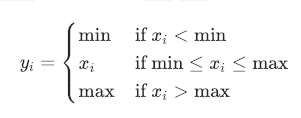

In [70]:
a = torch.tensor([-1, -0.3, 0.4, 3])
a.clamp(min=-0.5, max=0.5)

tensor([-0.5000, -0.3000,  0.4000,  0.5000])

### Eval / Train
model.eval() will notify all your layers that you are in eval mode, that way, batchnorm or dropout layers will work in eval model instead of training mode.

In [ ]:
self.qnetwork_local.eval()
with torch.no_grad():
    action_values = self.qnetwork_local(state)
self.qnetwork_local.train()

### Cat

In [3]:
a = torch.Tensor([[1,2,3], [4,5,6]])
b = torch.Tensor([1,2,3]).unsqueeze(0)
torch.cat([a,b], dim=0)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.]])

In [2]:
a = torch.Tensor([[1,2,3], [4,5,6]])
b = torch.Tensor([1,3]).unsqueeze(1)
torch.cat([a,b], dim=1)

tensor([[1., 2., 3., 1.],
        [4., 5., 6., 3.]])

### Push Tensor

In [26]:
def append(a, b, dim=0):
    b = b.unsqueeze(dim)
    if a is None:
        shape = list(b.shape)
        shape[dim] = 0
        a = b.new_empty(shape)
    return torch.cat([a, b], dim=dim)

In [27]:
a = None
b = torch.Tensor([[1,2,3], [4,5,6]])
c = torch.Tensor([[11,12,13], [14,15,16]])
a = append(a, b)
append(a, c)

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[11., 12., 13.],
         [14., 15., 16.]]])

### Pad

In [14]:
t4d = torch.empty(5, 4, 3, 2)
padding = (1, 1, 2, 3)  # pad last dim first/last of each dimension
out = F.pad(t4d, padding, "constant", 0)  # effectively zero padding
out.shape

torch.Size([5, 4, 8, 4])